<a href="https://colab.research.google.com/github/seong1542/Instagram_Account_detection/blob/master/Instagram_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [8]:
filepath='/content/gdrive/My Drive/'
train = pd.read_csv(filepath+'instagram_detection.csv')
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train)
train = pd.DataFrame(data = scaler.transform(train), columns = train.columns, index = train.index)
y_train = train['#fake']
X_train = train.drop('#fake',axis=1)
from sklearn.model_selection import train_test_split
X_train,X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size=0.2, random_state=0, shuffle=True)

print('X_train = ', X_train.shape)
print('X_valid = ', X_valid.shape)
print('y_train = ', y_train.shape)
print('y_valid = ', y_valid.shape)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_valid = tf.keras.utils.to_categorical(y_valid, num_classes=2)
print(y_train.shape, y_valid.shape)

X_train =  (8083, 16)
X_valid =  (2021, 16)
y_train =  (8083,)
y_valid =  (2021,)
(8083, 2) (2021, 2)


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout

def dnn_model():
  model=Sequential()

  #hidden layer #1
  model.add(Dense(units = (256), input_dim = 16))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.3))  
  #hidden layer #2
  model.add(Dense(units = (128)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.3))  
  #hidden layer #3
  model.add(Dense(units = (64)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.3))  
  #hidden layer #4
  model.add(Dense(units = (16)))
  model.add(Activation('relu'))

  #output layer
  model.add(Dense(units=2))
  model.add(Activation('softmax'))

  return model

In [10]:
model =dnn_model()
model.summary()
opti = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer = opti,loss = 'binary_crossentropy',metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               4352      
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
activation_6 (Activation)    (None, 128)              

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [11]:
hist = model.fit(X_train, y_train, epochs=200, verbose=True, batch_size=64, validation_data=(X_valid,y_valid), shuffle=False)

Epoch 1/200
127/127 [==============================] - 2s 6ms/step - loss: 0.4232 - accuracy: 0.8126 - val_loss: 0.4812 - val_accuracy: 0.8615
Epoch 2/200
127/127 [==============================] - 0s 4ms/step - loss: 0.3248 - accuracy: 0.8613 - val_loss: 0.3787 - val_accuracy: 0.8738
Epoch 3/200
127/127 [==============================] - 0s 4ms/step - loss: 0.3103 - accuracy: 0.8674 - val_loss: 0.3151 - val_accuracy: 0.8783
Epoch 4/200
127/127 [==============================] - 1s 4ms/step - loss: 0.3069 - accuracy: 0.8701 - val_loss: 0.2856 - val_accuracy: 0.8798
Epoch 5/200
127/127 [==============================] - 1s 4ms/step - loss: 0.2959 - accuracy: 0.8746 - val_loss: 0.2722 - val_accuracy: 0.8817
Epoch 6/200
127/127 [==============================] - 1s 4ms/step - loss: 0.2894 - accuracy: 0.8763 - val_loss: 0.2707 - val_accuracy: 0.8798
Epoch 7/200
127/127 [==============================] - 0s 4ms/step - loss: 0.2836 - accuracy: 0.8799 - val_loss: 0.2612 - val_accuracy: 0.8877

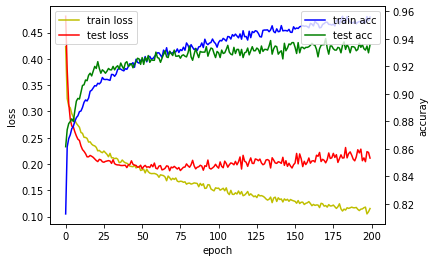

In [12]:
# visualization
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='test acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='upper right')

plt.show()

In [13]:
x=[[0,9,0,3,0,0,0,0,1,4,265,350,0,0,0,0]]  # 학습하지 않은, 진짜 계정의 정보를 입력  
dnn_y = model.predict(x)
print(dnn_y)  #(가짜계정이냐고 물어보았다고 생각해보면 -> False가 나와야함. 0자리에 1이 들어와있으니 False를 뜻하는 것)

[[1. 0.]]
